1. What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?
    - The fundamental idea of ensemble techniques is to combine multiple models to improve accuracy and reduce errors, creating a more robust prediction than a single model. Bagging differs from boosting in that bagging builds multiple models independently and in parallel on random data subsets to reduce variance, while boosting builds models sequentially, with each new model focusing on the errors of the previous one to reduce bias.
   - Bagging
   - Approach: Creates multiple independent models by training them in parallel on different random subsets of the original data, a process called bootstrap aggregating.
   - Objective: To reduce variance and prevent overfitting. This is especially useful for unstable models that have high variance.
   - Boosting
   - Approach: Builds models sequentially, where each new model is trained to correct the mistakes of the previous ones.
   - Objective: To reduce bias and improve accuracy. This is effective for stable, simple models that have high bias (underfitting).


2. Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.?
   - The Random Forest Classifier reduces overfitting compared to a single decision tree through the principles of ensemble learning and randomization.
   - Ensemble Learning: A single decision tree can easily overfit by learning the training data too precisely, including noise and outliers, leading to poor generalization on unseen data. Random Forest mitigates this by constructing multiple, relatively uncorrelated decision trees. Each tree is built on a different bootstrap sample of the training data (bagging), and at each split, only a random subset of features is considered. The final prediction is determined by aggregating the predictions of all individual trees (e.g., by majority vote for classification). This "wisdom of the crowd" approach averages out the individual errors and biases of the weaker, overfit trees, resulting in a more robust and generalizable model.
   - Role of Key Hyperparameters:
   - n_estimators (Number of Trees): This hyperparameter controls the number of decision trees in the forest. Increasing n_estimators generally improves the model's stability and reduces overfitting by providing more individual predictions to average, thus reducing variance. However, too many trees can lead to increased computational cost without significant performance gains.
   - max_features (Number of Features to Consider at Each Split): This hyperparameter dictates the number of features randomly sampled at each node when searching for the best split. By considering only a subset of features at each split, max_features introduces further decorrelation among the individual trees. This prevents any single feature from dominating the tree-building process and reduces the likelihood that all trees will make similar errors, thereby further reducing overfitting and improving generalization. Common values include sqrt (square root of the total number of features) or log2 (base-2 logarithm of the total number of features).


3. What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.
   - tacking is an ensemble learning technique that uses a meta-model to combine predictions from multiple diverse base models to improve accuracy. Unlike bagging and boosting, which typically use a single type of base model (like decision trees) and train them in parallel (bagging) or sequentially (boosting), stacking trains a final model on the predictions of various base models to learn how to best blend their outputs.


4. What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?
   - The OOB (Out-of-Bag) score is an internal validation metric in Random Forest that estimates model performance using data points not used in training individual trees. It is useful because it provides an unbiased performance estimate without needing a separate validation set, which is especially helpful for smaller datasets where splitting data would reduce training efficiency. The score is calculated by taking each data point, predicting it using the trees that were not trained on it, and then averaging the performance over all data points.
   - How it works
   - Bootstrap Aggregating (Bagging): Random Forest creates multiple decision trees by training each one on a random sample of the original data with replacement (called a bootstrap sample).
   - Out-of-Bag (OOB) Samples: For each tree, the data points not included in its bootstrap sample are the "out-of-bag" (OOB) samples.
   - Why it's useful
   - Internal Validation: The OOB score acts as a built-in cross-validation, giving a reliable, unbiased estimate of how the model will perform on new, unseen data.
   - Saves Data: It avoids the need to set aside a separate validation or test set, meaning more of the original data can be used for training the model, which is especially beneficial for smaller datasets.


5. Compare AdaBoost and Gradient Boosting in terms of: ● How they handle errors from weak learners ● Weight adjustment mechanism ● Typical use cases.?
   - AdaBoost and Gradient Boosting are both ensemble learning methods that build models sequentially, but they differ fundamentally in how they handle errors and adjust weights. AdaBoost focuses on misclassified data points by adjusting sample weights, while Gradient Boosting focuses on minimizing overall loss by fitting new models to the residual errors (gradients) of the previous ones.
   - How they handle errors from weak learners
   - AdaBoost: AdaBoost identifies misclassified data points and increases their importance (weights) in the training dataset for the next iteration. Subsequent weak learners (typically simple decision stumps) are then forced to focus more on correctly classifying these harder cases.
   - Gradient Boosting: Gradient Boosting builds each new weak learner (often deeper decision trees) to explicitly predict and correct the "residual errors" (the difference between the observed and predicted values) of the combined previous models. It essentially treats the residuals as a new target variable to be predicted.
Weight adjustment mechanism
   - AdaBoost:
   - Sample weights: AdaBoost adjusts the weights of individual data points after each round. Misclassified points get higher weights, while correctly classified points get lower weights.
   - Model weights: Each weak learner is also assigned a weight in the final ensemble based on its accuracy, so more accurate models have a greater influence on the final prediction.
   - Gradient Boosting:
   - Model contribution: Instead of adjusting data point weights, Gradient Boosting scales the contribution of each new model (tree) to the final prediction by a constant learning rate (shrinkage).
   - Loss optimization: The "weight adjustment" is implicit in the process of minimizing a specific, differentiable loss function using gradient descent, where new models are fit to the negative gradient of the loss.
Typical use cases
   - AdaBoost:
Works well with clean datasets that have minimal noise or outliers, as it is sensitive to them due to its aggressive weighting mechanism.
Often used in situations where interpretability matters because it typically uses simple, shallow base learners (decision stumps).
Effective for binary classification problems, such as face detection and object recognition.
   - Gradient Boosting:
Suitable for datasets with complex patterns, nonlinear relationships, or a large number of features.
Less sensitive to noisy data and outliers compared to AdaBoost (with appropriate regularization).
Widely used for both classification and regression tasks and often produces state-of-the-art results on structured data, especially with modern variants like XGBoost, LightGBM, and CatBoost. Common applications include credit risk assessment, disease prediction, and sales forecasting.


6. Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.?
   - CatBoost excels with categorical features due to its Ordered Boosting technique, which avoids manual preprocessing by automatically converting categorical variables into a numerical representation during training. It achieves this by creating a permutation-driven encoding that calculates statistics from historical data to replace categories, preventing data leakage and overfitting while improving model generalization.
   - How CatBoost handles categorical variables
   - Internal encoding: CatBoost processes categorical features without requiring the user to perform manual steps like one-hot or label encoding.
   - Ordered Boosting: The algorithm uses a combination of feature permutation and a form of target encoding that is robust to data leakage.
   - Permutation-driven encoding: For each tree, the training data is permuted in a random order. For a given data point, the categorical value is replaced by a statistical estimate (like the mean of the target value) calculated from the previous data points in that specific permutation.


7. KNN Classifier Assignment: Wine Dataset Analysis with Optimization Task: 1. Load the Wine dataset (sklearn.datasets.load_wine()). 2. Split data into 70% train and 30% test. 3. Train a KNN classifier (default K=5) without scaling and evaluate using: a. Accuracy b. Precision, Recall, F1-Score (print classification report) 4. Apply StandardScaler, retrain KNN, and compare metrics. 5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric (Euclidean, Manhattan). 6. Train the optimized KNN and compare results with the unscaled/scaled versions.?


In [2]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the Wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

# 2. Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train a KNN classifier (default K=5) without scaling
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)

print("--- KNN without Scaling (K=5) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_unscaled):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_unscaled))

# 4. Apply StandardScaler, retrain KNN, and compare metrics
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("\n--- KNN with StandardScaler (K=5) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_scaled):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_scaled))

# 5. Use GridSearchCV to find the best K and distance metric
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train) # Use scaled data for GridSearchCV

best_k = grid_search.best_params_['n_neighbors']
best_metric = grid_search.best_params_['metric']

print(f"\n--- GridSearchCV Results ---")
print(f"Best K: {best_k}")
print(f"Best Distance Metric: {best_metric}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# 6. Train the optimized KNN and compare results
knn_optimized = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn_optimized.fit(X_train_scaled, y_train)
y_pred_optimized = knn_optimized.predict(X_test_scaled)

print("\n--- Optimized KNN (Scaled Data) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_optimized):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_optimized))

--- KNN without Scaling (K=5) ---
Accuracy: 0.7407
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54


--- KNN with StandardScaler (K=5) ---
Accuracy: 0.9630
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54


--- GridSearchCV Results ---
Best K: 1
Best Distance Metric: manhattan
Best Cross-

8. PCA + KNN with Variance Analysis and Visualization Task: 1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()). 2. Apply PCA and plot the scree plot (explained variance ratio). 3. Retain 95% variance and transform the dataset. 4. Train KNN on the original data and PCA-transformed data, then compare accuracy. 5. Visualize the first two principal components using a scatter plot (color by class).?


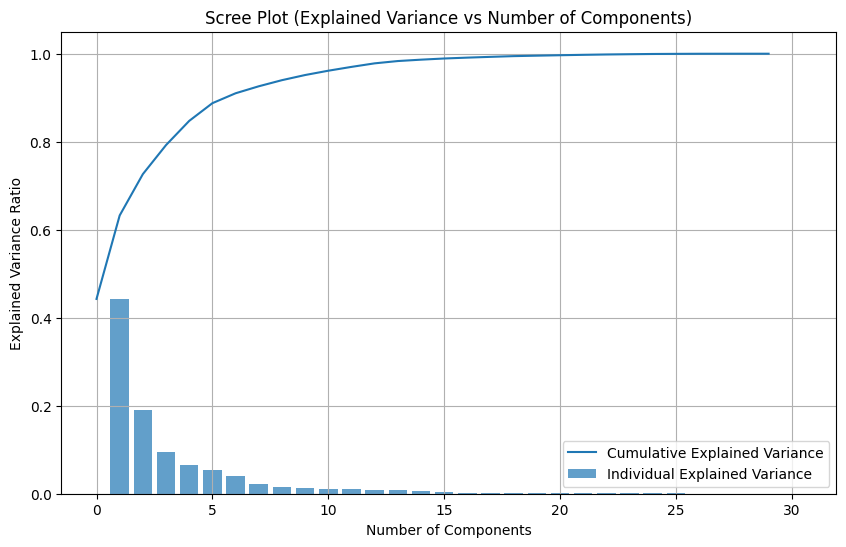

Original number of features: 30
Number of components retaining 95% variance: 10

Accuracy of KNN on original data: 0.9708
Accuracy of KNN on PCA-transformed data: 0.9474


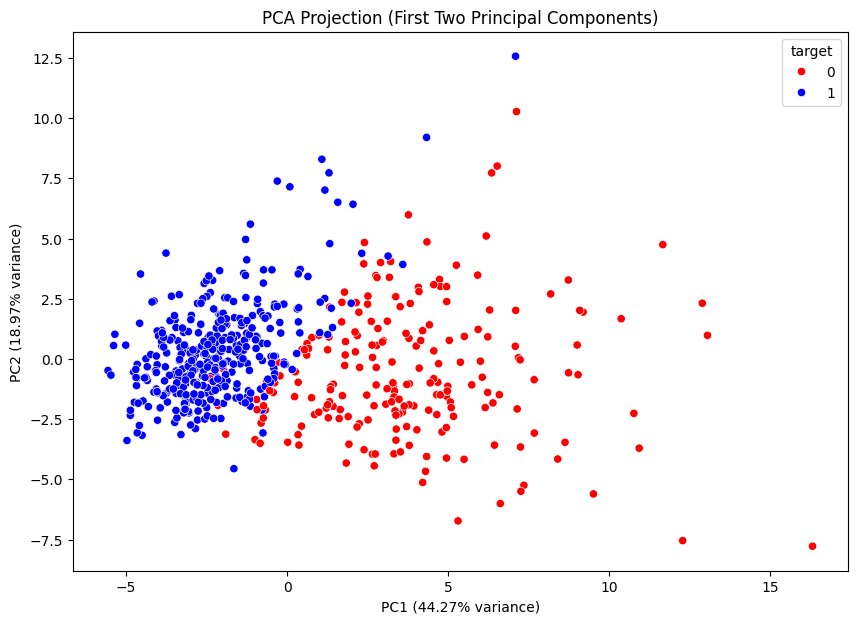

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd


# 1. Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names
target_names = cancer.target_names


# Standardize the data (PCA works best with scaled data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 2. Apply PCA and plot the scree plot (explained variance ratio)
pca_full = PCA().fit(X_scaled)
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, label='Cumulative Explained Variance')
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Individual Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot (Explained Variance vs Number of Components)')
plt.legend()
plt.grid(True)
plt.show()


# 3. Retain 95% variance and transform the dataset
# PCA(n_components=0.95) automatically selects the minimum number of components to retain 95% variance
pca_95 = PCA(n_components=0.95)
X_pca = pca_95.fit_transform(X_scaled)


print(f"Original number of features: {X.shape[1]}")
print(f"Number of components retaining 95% variance: {X_pca.shape[1]}")


# 4. Train KNN on the original data and PCA-transformed data, then compare accuracy


# Split original data
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
# Split PCA data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)


# Train KNN on original data
knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train_orig, y_train_orig)
y_pred_orig = knn_orig.predict(X_test_orig)
accuracy_orig = accuracy_score(y_test_orig, y_pred_orig)
print(f"\nAccuracy of KNN on original data: {accuracy_orig:.4f}")


# Train KNN on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
print(f"Accuracy of KNN on PCA-transformed data: {accuracy_pca:.4f}")


# 5. Visualize the first two principal components using a scatter plot (color by class)
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)


pca_df = pd.DataFrame(data=X_pca_2, columns=['PC1', 'PC2'])
pca_df['target'] = y


plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df, palette=['red', 'blue'])
plt.title('PCA Projection (First Two Principal Components)')
plt.xlabel(f'PC1 ({pca_2.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({pca_2.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.show()


9. KNN Regressor with Distance Metrics and K-Value Analysis Task: 1. Generate a synthetic regression dataset (sklearn.datasets.make_regression(n_samples=500, n_features=10)). 2. Train a KNN regressor with: a. Euclidean distance (K=5) b. Manhattan distance (K=5) c. Compare Mean Squared Error (MSE) for both. 3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.?


Mean Squared Error (Euclidean, K=5): 4600.79
Mean Squared Error (Manhattan, K=5): 5425.15

Comparison: Euclidean MSE is 4600.79, Manhattan MSE is 5425.15
K=1, MSE=7081.69
K=5, MSE=4600.79
K=10, MSE=5078.06
K=20, MSE=5890.61
K=50, MSE=7793.42


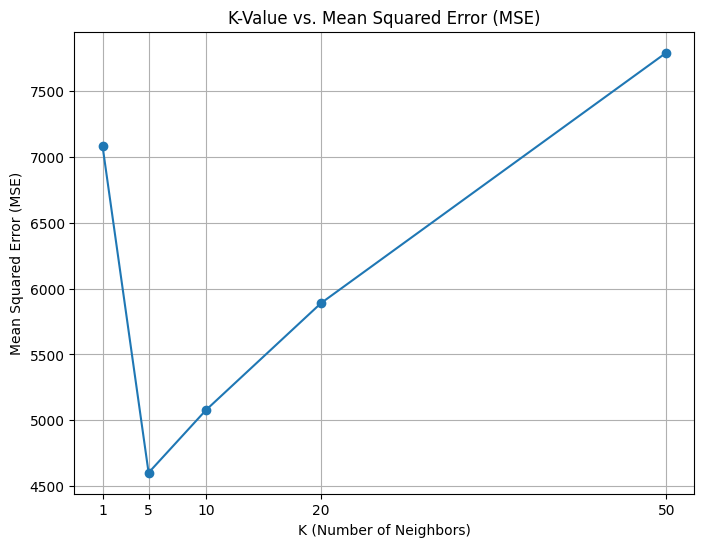

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


# 1. Generate a synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 2. Train KNN regressors with different distance metrics (K=5)
# a. Euclidean distance
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)
print(f"Mean Squared Error (Euclidean, K=5): {mse_euclidean:.2f}")


# b. Manhattan distance
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)
print(f"Mean Squared Error (Manhattan, K=5): {mse_manhattan:.2f}")


# c. Compare MSE for both
print(f"\nComparison: Euclidean MSE is {mse_euclidean:.2f}, Manhattan MSE is {mse_manhattan:.2f}")


# 3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff
k_values = [1, 5, 10, 20, 50]
mse_scores = []


for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean') # Using Euclidean for this analysis
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"K={k}, MSE={mse:.2f}")


# Plot K vs. MSE
plt.figure(figsize=(8, 6))
plt.plot(k_values, mse_scores, marker='o', linestyle='-')
plt.title('K-Value vs. Mean Squared Error (MSE)')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


10. KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data Task: 1. Load the Pima Indians Diabetes dataset (contains missing values). 2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values. 3. Train KNN using: a. Brute-force method b. KD-Tree c. Ball Tree 4. Compare their training time and accuracy. 5. Plot the decision boundary for the best-performing method (use 2 most important features).?


In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Pima Indians Diabetes dataset (contains missing values)
# The dataset often represents missing values as zeros in certain columns.
# We'll replace these with NaN for proper imputation.
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv('pima-indians-diabetes.csv', names=column_names)

# Replace 0s with NaN in relevant columns
cols_to_replace_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_replace_zero] = df[cols_to_replace_zero].replace(0, np.nan)

X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values
imputer = KNNImputer(n_neighbors=5)
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# 3. Train KNN using Brute-force, KD-Tree, and Ball Tree, and compare performance
methods = ['brute', 'kd_tree', 'ball_tree']
results = {}

for method in methods:
    print(f"\nTraining with algorithm: {method}")
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=method)

    start_time = time.time()
    knn.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    results[method] = {'training_time': training_time, 'accuracy': accuracy}
    print(f"  Training Time: {training_time:.4f} seconds")
    print(f"  Accuracy: {accuracy:.4f}")

# 4. Compare their training time and accuracy
print("\n--- Performance Comparison ---")
for method, data in results.items():
    print(f"Method: {method}, Training Time: {data['training_time']:.4f}s, Accuracy: {data['accuracy']:.4f}")

# Determine the best performing method based on accuracy (and potentially speed)
best_method = max(results, key=lambda k: results[k]['accuracy'])
print(f"\nBest performing method (based on accuracy): {best_method}")

# 5. Plot the decision boundary for the best-performing method
# To plot the decision boundary, we need to reduce the features to 2.
# We'll use the two features with the highest correlation to the 'Outcome'.
correlations = df.corr()['Outcome'].abs().sort_values(ascending=False)
important_features = correlations[1:3].index.tolist() # Top 2 features excluding 'Outcome' itself

print(f"\nUsing the two most important features for plotting: {important_features}")

X_plot = X_imputed[important_features]
X_train_plot, X_test_plot, y_train_plot, y_test_plot = train_test_split(X_plot, y, test_size=0.3, random_state=42)

best_knn = KNeighborsClassifier(n_neighbors=5, algorithm=best_method)
best_knn.fit(X_train_plot, y_train_plot)

# Create a meshgrid for plotting the decision boundary
x_min, x_max = X_plot.iloc[:, 0].min() - 1, X_plot.iloc[:, 0].max() + 1
y_min, y_max = X_plot.iloc[:, 1].min() - 1, X_plot.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
sns.scatterplot(x=X_plot.iloc[:, 0], y=X_plot.iloc[:, 1], hue=y, palette='RdYlBu', edgecolor='k', s=50)
plt.xlabel(important_features[0])
plt.ylabel(important_features[1])
plt.title(f'KNN Decision Boundary (Algorithm: {best_method}, K=5) with {important_features[0]} and {important_features[1]}')
plt.show()